# Proyek Analisis Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menyaipkan semua library yang dibuthkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("https://raw.githubusercontent.com/rasyidfirdaus482/data-analisis/refs/heads/main/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/rasyidfirdaus482/data-analisis/refs/heads/main/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Pertanyaan Analisis
* Bagaimana jumlah total pengguna sepeda (cnt) berubah setiap bulan?

* Apakah pengguna terdaftar (registered) lebih banyak dibandingkan pengguna biasa (casual)?

* Apakah jumlah pengguna sepeda lebih tinggi pada hari libur (holiday) dibandingkan hari kerja (workingday)?

* Musim apa yang memiliki jumlah pengguna sepeda tertinggi?

* Jam berapa yang memiliki jumlah pengguna tertinggi dalam satu hari?

* Bagaimana kondisi cuaca (weathersit) memengaruhi jumlah total pengguna?

### Assessing Data

#### Menilai tabel `day_df`



In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [12]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


###Pada data diatas terlihat penggunaan sepeda nilai max nya 977 jauh dari sangat jauh dari quartil 3 yaitu 281. ini terindikasi ada outlier yang harus diperiksa lebih lanjut

###identifikasi outlier

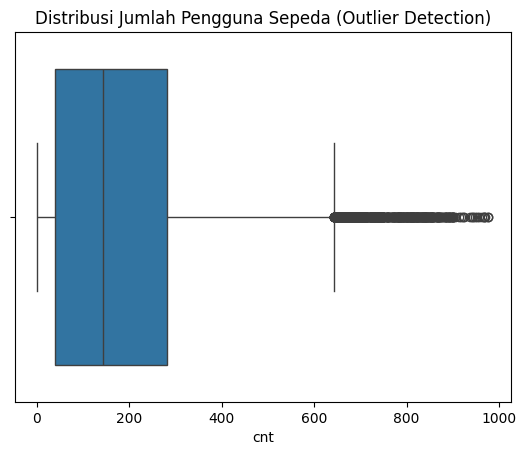

In [13]:
sns.boxplot(x=hour_df['cnt'])
plt.title('Distribusi Jumlah Pengguna Sepeda (Outlier Detection)')
plt.show()

In [14]:
print(hour_df['cnt'].describe())


count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


In [15]:
high_cnt = hour_df[hour_df['cnt'] == 977]
print(high_cnt)


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
14773    14774  2012-09-12       3   1     9  18        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
14773           1           1  0.66  0.6212  0.44     0.2537      91   

       registered  cnt  
14773         886  977  


Namun pada data  ini dapat memberikan kesimpulan bahwa outlier bisa jadi wajar karena beberapa faktor
* jam 18:00 adalah jam pulang kerja
* kondisi cuaca 1 (cerah)
* jumlah peminjam casual dan registered berkesesuaian dengan jumlah peminjaman pada jam tersebut (cnt)

In [16]:
hour_df[hour_df['hr'] == 18]['cnt'].describe()


,cnt
count,728.000000
mean,425.510989
std,224.639304
min,23.000000
25%,235.000000
50%,418.500000
75%,562.250000
max,977.000000


In [17]:
high_cnt_weather = hour_df[(hour_df['cnt'] == 977)][['weathersit', 'temp', 'hum']]
print(high_cnt_weather)


       weathersit  temp   hum
14773           1  0.66  0.44


### Cleaning Data

##### Memperbaiki tipe data

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [19]:
hour_df['hr_time'] = pd.to_datetime(hour_df['hr'], format='%H').dt.time


print(hour_df[['hr', 'hr_time']].head())

   hr   hr_time
0   0  00:00:00
1   1  01:00:00
2   2  02:00:00
3   3  03:00:00
4   4  04:00:00


In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [22]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
603,604,2012-08-26,3,1,8,0,0,0,2,0.653333,0.595996,0.845833,0.228858,1483,3772,5255
214,215,2011-08-03,3,0,8,0,3,1,2,0.731667,0.679937,0.657500,0.135583,467,3107,3574
573,574,2012-07-27,3,1,7,0,5,1,1,0.781667,0.734217,0.594583,0.152992,1259,5645,6904
213,214,2011-08-02,3,0,8,0,2,1,1,0.783333,0.707071,0.491250,0.205850,801,4044,4845
619,620,2012-09-11,3,1,9,0,2,1,1,0.577500,0.554292,0.520000,0.092054,1070,6697,7767


In [23]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


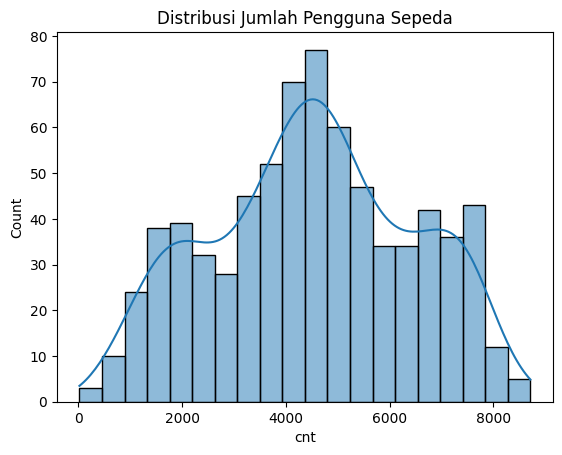

In [24]:

sns.histplot(day_df['cnt'], bins=20, kde=True)
plt.title('Distribusi Jumlah Pengguna Sepeda')
plt.show()


In [25]:
# Menghitung rata-rata pengguna sepeda per bulan
avg_usage_per_month = day_df.groupby('mnth')['cnt'].mean()


month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
avg_usage_per_month.index = month_names

print("Rata-rata Penggunaan Sepeda per Bulan:")
print(avg_usage_per_month)


Rata-rata Penggunaan Sepeda per Bulan:
January      2176.338710
February     2655.298246
March        3692.258065
April        4484.900000
May          5349.774194
June         5772.366667
July         5563.677419
August       5664.419355
September    5766.516667
October      5199.225806
November     4247.183333
December     3403.806452
Name: cnt, dtype: float64


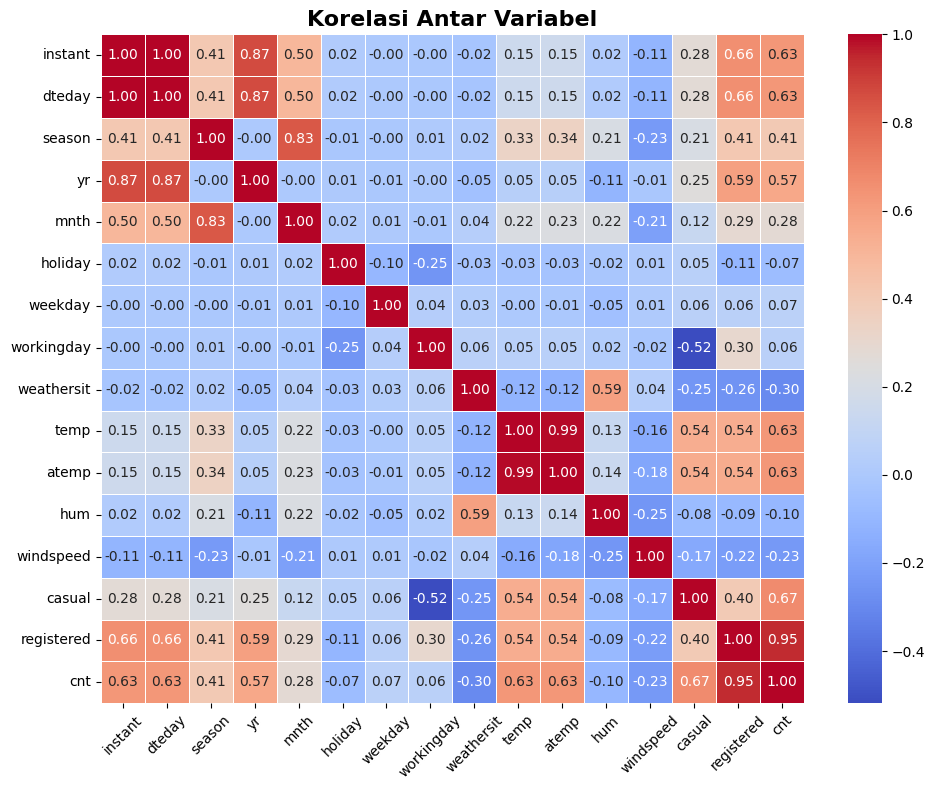

In [26]:

plt.figure(figsize=(10, 8))
sns.heatmap(
    day_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Korelasi Antar Variabel', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

###explore `hour_df`


In [27]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_time
12730,12731,2012-06-19,2,1,6,15,0,2,1,1,0.78,0.7424,0.59,0.1642,72,187,259,15:00:00
14163,14164,2012-08-18,3,1,8,8,0,6,0,1,0.64,0.6061,0.69,0.2537,28,161,189,08:00:00
8230,8231,2011-12-14,4,0,12,14,0,3,1,2,0.38,0.3939,0.54,0.0896,17,134,151,14:00:00
6693,6694,2011-10-11,4,0,10,11,0,2,1,2,0.60,0.5909,0.73,0.1642,31,92,123,11:00:00
8209,8210,2011-12-13,4,0,12,17,0,2,1,1,0.36,0.3485,0.40,0.1940,17,381,398,17:00:00


In [28]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_time
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [29]:
# Rata-rata penggunaan sepeda per jam
hourly_avg = hour_df.groupby('hr_time')['cnt'].mean().reset_index()

print("Rata-rata Penggunaan Sepeda per Jam:")
print(hourly_avg)


Rata-rata Penggunaan Sepeda per Jam:
     hr_time         cnt
0   00:00:00   53.898072
1   01:00:00   33.375691
2   02:00:00   22.869930
3   03:00:00   11.727403
4   04:00:00    6.352941
5   05:00:00   19.889819
6   06:00:00   76.044138
7   07:00:00  212.064649
8   08:00:00  359.011004
9   09:00:00  219.309491
10  10:00:00  173.668501
11  11:00:00  208.143054
12  12:00:00  253.315934
13  13:00:00  253.661180
14  14:00:00  240.949246
15  15:00:00  251.233196
16  16:00:00  311.983562
17  17:00:00  461.452055
18  18:00:00  425.510989
19  19:00:00  311.523352
20  20:00:00  226.030220
21  21:00:00  172.314560
22  22:00:00  131.335165
23  23:00:00   87.831044


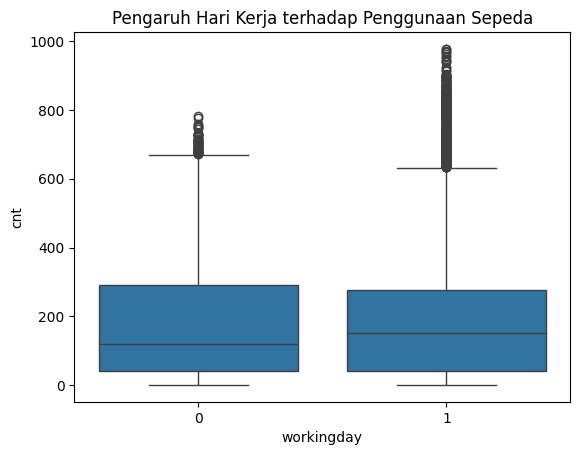

In [30]:
sns.boxplot(x='workingday', y='cnt', data=hour_df)
plt.title('Pengaruh Hari Kerja terhadap Penggunaan Sepeda')
plt.show()


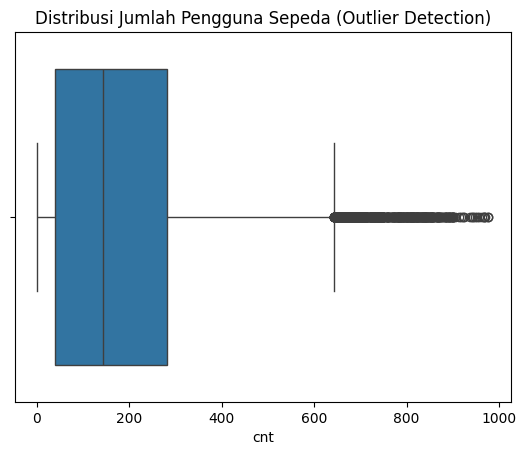

In [31]:
sns.boxplot(x=hour_df['cnt'])
plt.title('Distribusi Jumlah Pengguna Sepeda (Outlier Detection)')
plt.show()


## Visualization & Explanatory Analysis

### Bagaimana jumlah total pengguna sepeda (cnt) berubah setiap bulan?

<ipython-input-32-dfe3a1a0da77>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_usage, x='mnth', y='cnt', palette='viridis')


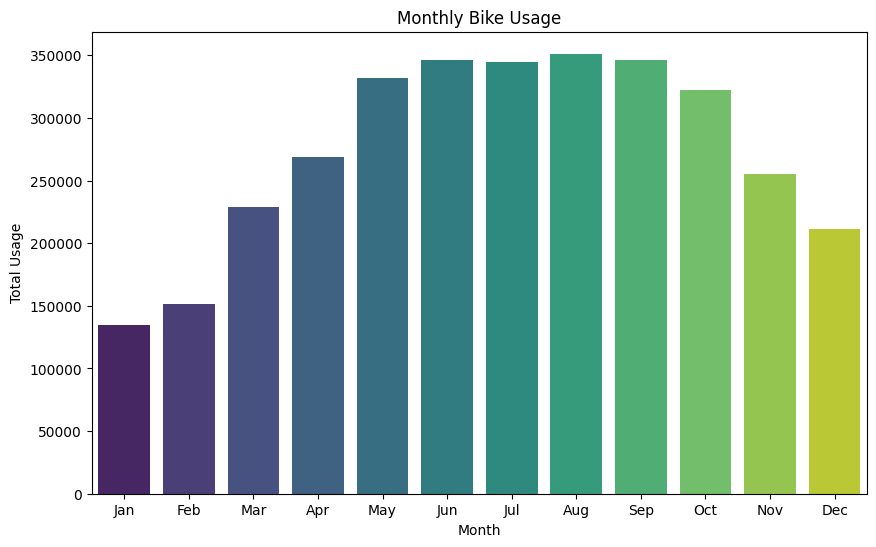

In [32]:
monthly_usage = day_df.groupby('mnth')['cnt'].sum().reset_index()
monthly_usage['mnth'] = monthly_usage['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                                   7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_usage, x='mnth', y='cnt', palette='viridis')
plt.title('Monthly Bike Usage')
plt.xlabel('Month')
plt.ylabel('Total Usage')
plt.show()

### Apakah pengguna terdaftar (registered) lebih banyak dibandingkan pengguna biasa (casual)?

<ipython-input-33-776be47fdc49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_type_totals, x='User Type', y='Total', palette='coolwarm')


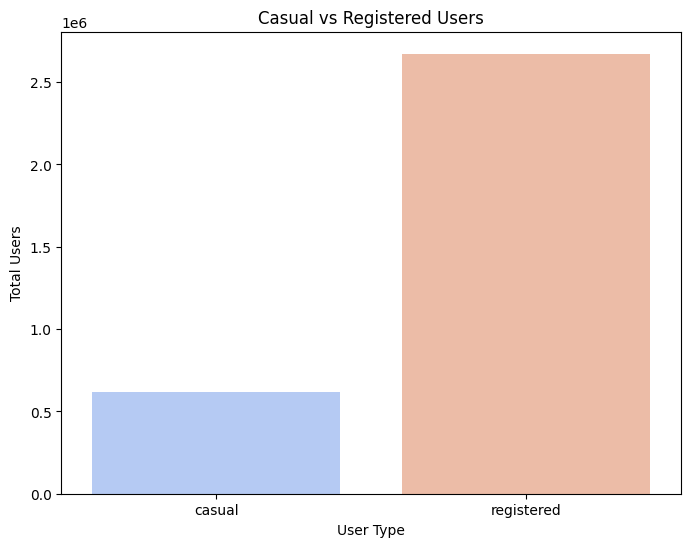

In [33]:

user_type_totals = day_df[['casual', 'registered']].sum().reset_index()
user_type_totals.columns = ['User Type', 'Total']
plt.figure(figsize=(8, 6))
sns.barplot(data=user_type_totals, x='User Type', y='Total', palette='coolwarm')
plt.title('Casual vs Registered Users')
plt.xlabel('User Type')
plt.ylabel('Total Users')
plt.show()

### Apakah jumlah pengguna sepeda lebih tinggi pada hari libur (holiday) dibandingkan hari kerja (workingday)?


<ipython-input-34-b2461d56c859>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_workday_usage, x='Label', y='cnt', palette='Set2')


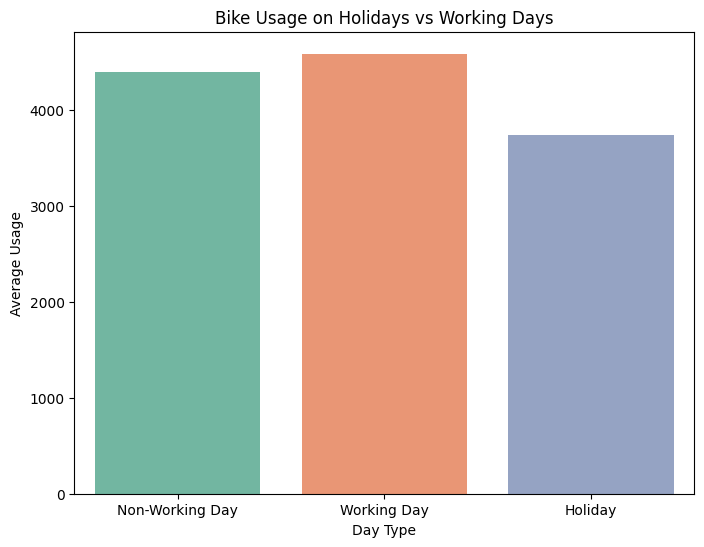

In [34]:

holiday_workday_usage = day_df.groupby(['holiday', 'workingday'])['cnt'].mean().reset_index()
holiday_workday_usage['Label'] = holiday_workday_usage.apply(lambda x: 'Holiday' if x['holiday'] == 1 else (
    'Working Day' if x['workingday'] == 1 else 'Non-Working Day'), axis=1)
plt.figure(figsize=(8, 6))
sns.barplot(data=holiday_workday_usage, x='Label', y='cnt', palette='Set2')
plt.title('Bike Usage on Holidays vs Working Days')
plt.xlabel('Day Type')
plt.ylabel('Average Usage')
plt.show()


### Musim apa yang memiliki jumlah pengguna sepeda tertinggi?



<ipython-input-35-5dadd290bcc7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_usage, x='season', y='cnt', palette='pastel')


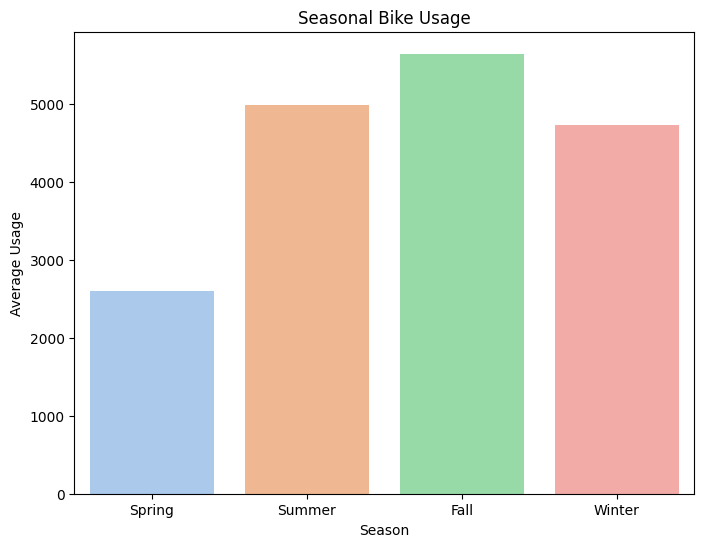

In [35]:

season_usage = day_df.groupby('season')['cnt'].mean().reset_index()
season_usage['season'] = season_usage['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
plt.figure(figsize=(8, 6))
sns.barplot(data=season_usage, x='season', y='cnt', palette='pastel')
plt.title('Seasonal Bike Usage')
plt.xlabel('Season')
plt.ylabel('Average Usage')
plt.show()

### Jam berapa yang memiliki jumlah pengguna tertinggi dalam satu hari?



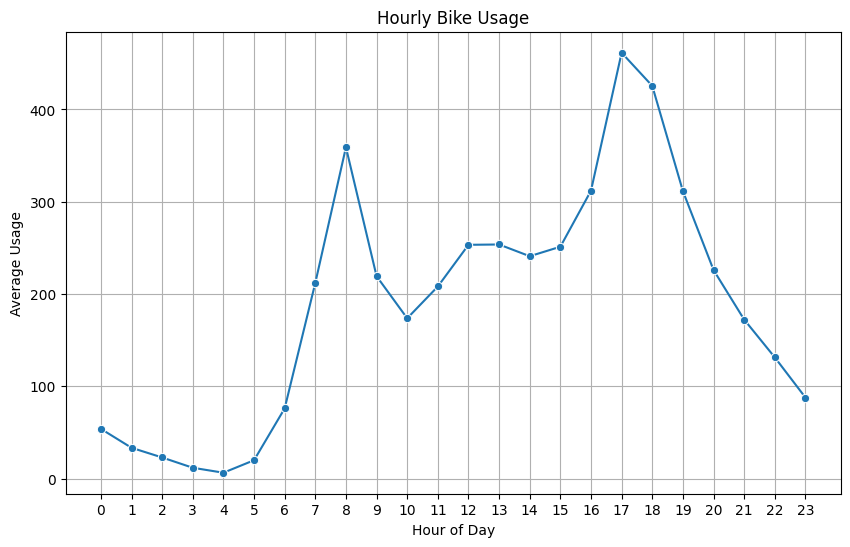

In [36]:

hourly_usage = hour_df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_usage, x='hr', y='cnt', marker='o')
plt.title('Hourly Bike Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Average Usage')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Bagaimana kondisi cuaca (weathersit) memengaruhi jumlah total pengguna?

<ipython-input-37-fa6f3ba0f198>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_usage, x='weathersit', y='cnt', palette='muted')


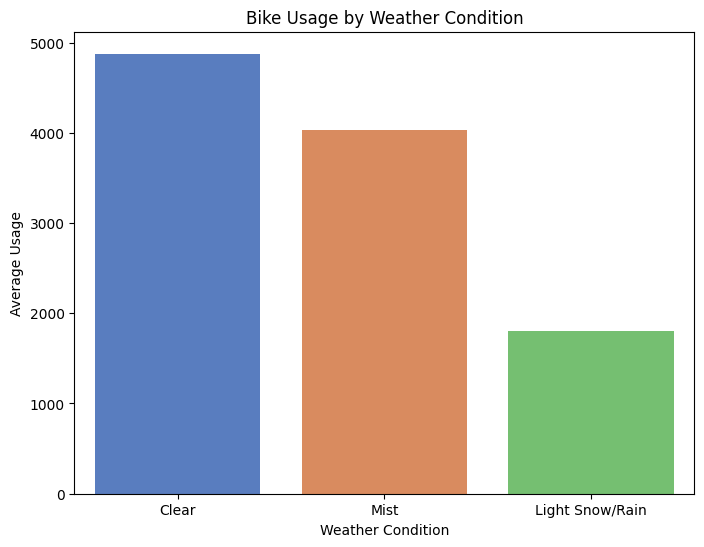

In [37]:

weather_usage = day_df.groupby('weathersit')['cnt'].mean().reset_index()
weather_usage['weathersit'] = weather_usage['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain'})
plt.figure(figsize=(8, 6))
sns.barplot(data=weather_usage, x='weathersit', y='cnt', palette='muted')
plt.title('Bike Usage by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Usage')
plt.show()

# Rangkuman
* Perubahan pengguna sepeda setiap bulan dari januari terus meningkat hingga pada puncaknya yaitu bulan agustus lalu menurun lagi
* pengguna terdaftar lebih banyak menggunakan sepeda daripada pengguna biasa
* pengguna pada hari kerja lebih banyak daripada non hari kerja dan holiday
* Pengguna tertinggi adalah pada musim gugur
* rata rata pengguna tertinggi dalam 24 jam setiap harinya adalah pada puku 17:00
* kondisi cuaca juga mempengaruhi jumlah pengguna, pengguna akan berkurang ketika cuaca semakin buruk

In [39]:
hour_df.to_csv("main_hour_df_data.csv", index=False)